In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('SVG')
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import urllib
import geopy
import re
from IPython.display import display
'''
import all the geocoders you like.
Use dir(geopy.geocoders) to see all the options.
'''
from geopy.geocoders import Nominatim, ArcGIS, GoogleV3, GeoNames
%matplotlib inline


# url = "https://raw.githubusercontent.com/Elixeus/PUI2015_xwang/master/plotstyle.json"
# response = urllib.urlopen(url)
# s = json.loads(response.read())
# plt.rcParams.update(s)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# food.rating.plot(kind='box')

In [5]:
# # show all the columns (import the module: IPython.display)
# with pd.option_context('display.max_columns', None):
#     display(food.head())

In [8]:
two = pd.read_csv('InspectionGeoYelp.csv')

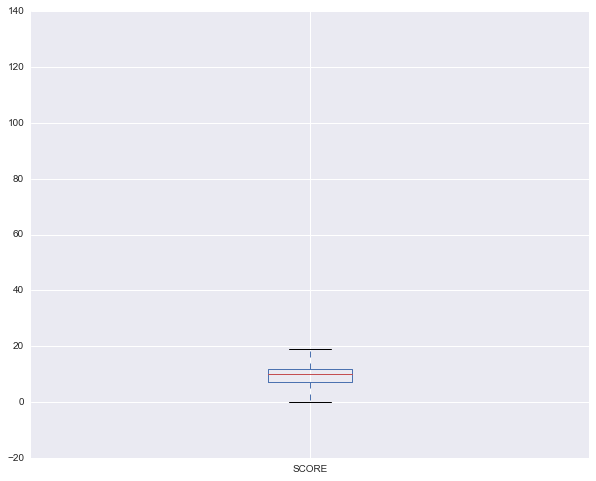

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
two.SCORE.plot(kind='box', ax=ax)

In [10]:
# food['latlon'] = zip(food['lat'].round(5), food['lon'].round(5))
# food['latlon']

In [11]:
two.ix[two[two.lat == 'Error'].index, 'lat'] = None
two.ix[two[two.lon == 'Error'].index, 'lon'] = None
two.dropna(inplace=True)
two['lat_short'] = 0
two['lon_short'] = 0

In [12]:
two['lat_short'] = two.lat.map(lambda x: x[:8])
two['lon_short'] = two.lon.map(lambda x: x[:9])

In [14]:
two['latlon'] = zip(two.lat_short, two.lon_short)
two['latlon'].head()

0    (40.84826, -73.85595)
1    (40.66287, -73.96218)
2    (40.66287, -73.96218)
3    (40.76761, -73.98492)
4    (40.57955, -73.98205)
Name: latlon, dtype: object

In [16]:
# combine = pd.merge(food, two, on='latlon')

In [17]:
# combine

In [18]:
# food.plot(kind='scatter', x='lon', y='lat')

In [19]:
two['lat_num'] = two['lat'].astype(float)
two['lon_num'] = two['lon'].astype(float)

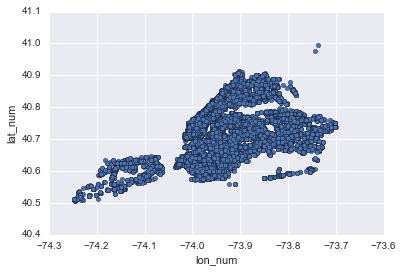

In [20]:
two[(two['lat_num']>= 40) & (two['lon_num']<=-73.5)].plot(kind='scatter', x='lon_num', y='lat_num')

In [21]:
# with pd.option_context('display.max_columns', None):
#     display(food.head())

In [22]:
with pd.option_context('display.max_columns', None):
    display(two.head())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,GRADE,SCORE,MONTH,ADDRESS,lat,lon,STREET_ADDRESS,YelpRating,lat_short,lon_short,latlon,lat_num,lon_num
0,0,0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,A,2.0,3,"1007 MORRIS PARK AVE, BRONX, New York 10462",40.848266969845895,-73.85595253867791,"1007 MORRIS PARK AVE, BRONX, New York,NY",4.5,40.84826,-73.85595,"(40.84826, -73.85595)",40.848267,-73.855953
1,1,1,1,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,A,8.0,12,"469 FLATBUSH AVENUE, BROOKLYN, New York 11225",40.66287297291046,-73.96218122858005,"469 FLATBUSH AVENUE, BROOKLYN, New York,NY",4.5,40.66287,-73.96218,"(40.66287, -73.96218)",40.662873,-73.962181
2,2,2,2,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,B,23.0,7,"469 FLATBUSH AVENUE, BROOKLYN, New York 11225",40.66287297291046,-73.96218122858005,"469 FLATBUSH AVENUE, BROOKLYN, New York,NY",2.0,40.66287,-73.96218,"(40.66287, -73.96218)",40.662873,-73.962181
3,3,3,3,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019,Irish,A,2.0,9,"351 WEST 57TH STREET, MANHATTAN, New York 10019",40.7676164567352,-73.98492902395446,"351 WEST 57TH STREET, MANHATTAN, New York,NY",2.0,40.76761,-73.98492,"(40.76761, -73.98492)",40.767616,-73.984929
4,4,4,4,40356018,RIVIERA CATERER,BROOKLYN,11224,American,A,5.0,6,"2780 STILLWELL AVENUE, BROOKLYN, New York 11224",40.579553915881604,-73.98205601647118,"2780 STILLWELL AVENUE, BROOKLYN, New York,NY",3.5,40.57955,-73.98205,"(40.57955, -73.98205)",40.579554,-73.982056


In [23]:
inspec = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

/Users/eliseowang/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
with pd.option_context('display.max_columns', None):
    display(inspec.head())

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,04/05/2016,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,04/05/2016,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,04/05/2016,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,03/03/2014,04/05/2016,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,04/05/2016,Trans Fat / Second Compliance Inspection


In [33]:
# inspec['INSPECTION DATE'].filter(regex='/2015$')

In [34]:
# select only 2015 data
inspec15 = inspec[inspec['INSPECTION DATE'].str.contains('/2015$', regex=True)]

In [35]:
gp = inspec15.groupby(['CAMIS', 'SCORE'])

In [36]:
short = two[['CAMIS', 'lat_num', 'lon_num', 'lat_short', 'lon_short']]

In [37]:
short['CAMIS'].unique().shape

(20544,)

In [38]:
whole = pd.merge(inspec15, short, on='CAMIS')

In [39]:
whole['latlon'] = whole['lat_short'].astype(str) + ', ' + whole['lon_short'].astype(str)

In [45]:
whole.drop(['lat_short', 'lon_short'], axis=1, inplace=True)

In [ ]:
['CAMIS', 'DBA','latlon']

In [70]:
penul = whole.drop_duplicates(subset=['CAMIS'], keep='first')

In [71]:
final = penul[['CAMIS', 'DBA','latlon']]

In [74]:
final.reset_index(drop=True, inplace=True)

In [76]:
final.to_csv('Merge_target.csv')

In [78]:
final.head()

,CAMIS,DBA,latlon
0,30075445,MORRIS PARK BAKE SHOP,"40.84826, -73.85595"
1,30112340,WENDY'S,"40.66287, -73.96218"
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,"40.76761, -73.98492"
3,40356018,RIVIERA CATERER,"40.57955, -73.98205"
4,40356151,BRUNOS ON THE BOULEVARD,"40.76399, -73.88048"
